# Recherche d'un élément dans un tableau 

# Le problème :

On considère, une liste ou tableau, __déjà trié par ordre croissant__. On cherche à déterminer la position d'un élément e de la liste L

# $\color{red}{\text{Un premier algorithme naïf}}$

## Exercice 1

- Compléter la fonction Python ci-dessous

In [1]:
def algorithme_naif(L,e) :
    """Renvoie le premier indice de l'élément e dans L
    
    >>> algorithme_naif([2,8,23,45,101],23)
    True
    >>> algorithme_naif([-10,-6,1,3,9,58],4)
    False
    """
    present = False
    for i in range(len(L)) :
        if L[i] == e :
            present = True
    return present
 

if __name__=="__main__" :
    import doctest
    doctest.testmod(verbose=True)

Trying:
    algorithme_naif([2,8,23,45,101],23)
Expecting:
    True
ok
Trying:
    algorithme_naif([-10,-6,1,3,9,58],4)
Expecting:
    False
ok
1 items had no tests:
    __main__
1 items passed all tests:
   2 tests in __main__.algorithme_naif
2 tests in 2 items.
2 passed and 0 failed.
Test passed.


> __Remarques__ :
    - L'élément peut-être présent tôt dans la liste et il n'est plus nécessaire d'effectuer les comparaisons sur le reste de la liste.
    - Même si ne considérons que les listes triées, on remarquera que cet algorithme fonctionne parfaitement si la liste n'est pas triée.

## Pour aller plus loin

On peut donc faire les deux modifications suivantes :

In [2]:
def algorithme_naif2(L,e) :
    """Renvoie le premier indice de l'élément e dans L
    
    >>> algorithme_naif2([2,8,45,101,23],23)
    True
    >>> algorithme_naif2([-6,9,-10,3,58,1],4)
    False
    
    """
    i=0
    while i < len(L) and L[i] !=e  : #On s'arrête dès que l'élement est rencontré ou à la fin, s'il ne l'est pas
          i = i + 1
    return i < len(L) # On renvoie un booléen 
                      # i <len(L) vaut True si l'élément est présent
                      # Si l'élement n'est pas présent i vaut len(L) et donc i<len(L) vaut False
                               

if __name__=="__main__" :
    import doctest
    doctest.testmod(verbose=True)

Trying:
    algorithme_naif([2,8,23,45,101],23)
Expecting:
    True
ok
Trying:
    algorithme_naif([-10,-6,1,3,9,58],4)
Expecting:
    False
ok
Trying:
    algorithme_naif2([2,8,45,101,23],23)
Expecting:
    True
ok
Trying:
    algorithme_naif2([-6,9,-10,3,58,1],4)
Expecting:
    False
ok
1 items had no tests:
    __main__
2 items passed all tests:
   2 tests in __main__.algorithme_naif
   2 tests in __main__.algorithme_naif2
4 tests in 3 items.
4 passed and 0 failed.
Test passed.


# $\color{red}{\text{Une recherche plus efficace, la dichotomie}}$

## Le principe

<div class="alert alert-block alert-danger">
La méthode est la suivante :
    <br />

1. On choisit dans la liste __la valeur médiane__.
    <br />
    
2. On __compare__ l'élément recherché à la valeur médiane :

    - Si ils sont égaux, c'est terminé ;
    - Si l'élement est supérieur à la valeur médiane, on cherche dans la deuxième partie de la liste ;
    - Si l'élément est inférieur à la valeur médiane, on cherche dans la première partie de la liste ;
   
 <br />    
3. On __recommence__ les étapes précédentes jusqu'à ce que l'élément soit trouvé ou non.
</div>

Examinons la méthode visuellement sur deux exemples :
 
### Exemple 1 :

L'élement 8 est-il présent dans la liste [-3,2,2,5,6,7,8,11,15,22,23]
 

%%html

<tr>
    <td><img src="img/dichotomie_1.png"></td>
    <td>
        <ul>
            <li><p> La valeur médiane de la liste est 7. 
                <br />
                Comme 8 > 7, on s'intéresse à la liste [8, 11, 15, 22, 23]</p>
            </li>
            <br />
            <li><p>La valeur médiane est 15.
                <br />
                Comme 8 &lt; 15, on ne s'intéresse plus qu'à la liste [8,11]</p>
            </li>
            <br />
            <li><p> La valeur médiane est 8. 
                <br />
                Comme 8 = 8 , l'algorithme se termine et renvoie True.</p>
            </li>
        </ul>
     </td>      
     
    
</tr>



### Exemple 2

L'élément 20 est-il présent dans la liste [11, 17, 21, 24, 24, 32, 37, 38, 40, 50]
 

%%html

<tr>
    <td align="center"><img src="img/dichotomie_2.png"></td>
    <td>
        <ul>
            <li><p>
                La valeur médiane de la liste est 24.
                <br />
                Comme 20 &lt; 24, on s'intéresse à la liste [11, 17, 21, 24]
                </p>
            </li>
            <br />
            <li><p>La valeur médiane est 17.
                <br />
                Comme 20 > 17, on ne s'intéresse plus qu'à la liste [21,24].
                </p>
            </li>
            <br />
            <li><p>
                La valeur médiane est 21.
                <br />
                Comme 20 &lt; 21 , il ne reste plus que la liste vide et l'algorithme se termine et renvoie False.
                </p>
            </li>
        </ul>
     </td>
        
                
                
     
    
</tr>

## L'algorithme 

### Un premier exemple d'algorithme

    ENTRÉE: L est une liste ou un tableau de nombres trié dans l'ordre croissant
             e un nombre
    
    SORTIE : un booléen

    debut <- 0
    fin <- taille de L - 1
    TANT_QUE debut < fin faire
        milieu <- (debut + fin) // 2
        SI L[milieu] = e faire
            RETOURNER Vrai
        SINON
            SI L[milieu] > e faire
                fin <- milieu - 1
            SINON
                debut <- milieu + 1
            FINSI
        FINSI
    Fin Tantque
    RETOURNER Faux
    


> __Remarque__ : L'algorithme ci-dessus est correct mais n'est pas complètement satisfaisant algorithmiquement en raison de la présence des deux "RETOURNER".
On verra également en Terminale, une autre façon de programmer cet algorithme de manière __récursive__.

### Une version améliorée de l'algorithme précédent

    ENTRÉE: L est une liste ou un tableau de nombres trié dans l'ordre croissant
             e un nombre
    
    SORTIE : un booléen

    
       debut <- 0
    fin <- taille de L - 1
    present <- Faux
    TANT_QUE debut < fin and (not present) faire
        milieu <- (debut + fin) // 2
        SI L[milieu] = e faire
            present <- Vrai
        SINON
            SI L[milieu] > e faire
                fin <- milieu - 1
            SINON
                debut <- milieu + 1
            FINSI
        FINSI
    Fin Tantque
    RETOURNER present


### Exercice 2: 

Compléter la fonction Python, implémentant l'algorithme de dichotomie.

In [11]:
def dichotomie(L,e) :
    debut = 0
    fin = len(L)-1
    present = False
    while debut < fin and (not present) :
        milieu = (debut + fin) // 2
        if L[milieu] == e :
            present = True
        else :
            if L[milieu] > e :
                fin = milieu - 1
            else :
                debut = milieu + 1
    return present


Vous pouvez tester votre programme avec les deux exemples suivants.

In [12]:
dichotomie([1,2,3,4,5,6,7],6)

True

In [13]:
dichotomie([-2,5,11,14,38,49],20)

False

Vous pouvez également le mettre à l'épreuve de ce test plus élaboré.

In [17]:
from random import randint

L =sorted([randint(1,300) for _ in range(200)])

dichotomie(L,172) == (172 in L)

True

## Terminaison de l'algorithme

Contrairement au situation précédemment rencontrée, la terminaison de l'algorithme n'est pas acquise. 
Elle doit être prouvée.

Dans le cas d'un algorithme comportant un boucle TANT_QUE, la preuve de la terminaison s'obtient en trouvant ce qu'on appelle un __variant de boucle__.

<div class="alert alert-block alert-success">
    <b><h2>Définition</h2></b> :
    <br />
    Un variant de boucle est :
    <ul>
        <li>Un nombre entier <b>strictement positif</b></li>
        <li><b>strictement décroissant</b> avec chaque itération de la boucle</li>
        <li>qui devient négatif à partir d'une certaine itération entraînant la terminaison de la boucle</li>
    </ul>
    

</div>

## Recherche du variant

On va s'intéresser uniquement au __premier algorithme__ que nous avons écrit.

Un tel __variant__ existe et... c'est __à vous de le trouver !__

La condition de sortie de la boucle étant `debut <= fin`, on sortira dès que `debut > fin`, autrement dit dès que `fin - debut < 0`.

La valeur __`fin - debut` fera donc un excellent variant__ pour notre boucle !

Le variant étant trouvé, il ne reste plus qu'à __prouver la terminaison de l'algorithme__ :

- initialement la valeur `fin - debut` est égale à la longueur du tableau. A condition d'avoir un tableau non vide, __le variant est est donc bien un entier positif__.
- comment varie le variant lors d'une itération de boucle quelconque ?
  - si la valeur cherchée est égale à la valeur médiane, la boucle se termine immédiatement.
  - si la valeur cherchée est inférieure à la valeur médiane de la zone de recherche, la valeur __`fin` diminuera__.
  - si la valeur cherchée est supérieure à la valeur médiane de la zone de recherche, la valeur __`debut` augmentera__.
  - dans les deux derniers cas, la valeur __`fin - debut` sera strictement décroissante__.
- __la valeur `fin - debut`__, initialement positive et strictement décroissante, __atteindra donc nécessairement une valeur négative__, condition suffisante pour sortir de la boucle TANT QUE (la condition `debut <= fin` devenant fausse).

## Complexité

Nous allons comparer la complexité de l'algorithme naïf de recherche avec l'algorithme de dichotomie.

### Exercice  3:


1. Quel est le pire cas ?
2. Déterminer la classe de complexité de l'algorithme naïf dans le pire cas.


__Solution__

1. Il n'y a pas de pire cas. On parcourt l'ensemble des éléments du tableau.

2. La classe de complexité est $O(N)$ où N est la taille de la liste.

## Comparaison expérimentale de la complexité

Pour étudier l'algorithme de dichotomie, nous allons simuler plusieurs recherches d'élements dans des tableaux de taille de plus en plus grande.

Nous allons ainsi observer l'évolution du temps de calcul nécessaire en fonction de la taille de la liste donnée.



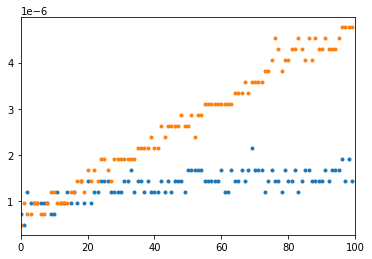

In [7]:
import time
from random import *
from matplotlib import pyplot as plt
from pylab import *

def liste_aleatoire(n):
    return [randint(1,500) for __ in range(n)]

def temps_execution(f,L,e):
    t1 = time.time()
    f(L,e)
    t2 =time.time() - t1
    return t2

def graphique(n):
    abs_liste =[k for k in range(n)]
    ord_liste=[]
    ord_liste2=[]
    for abscisse in abs_liste :
        L = liste_aleatoire(abscisse)
        ord_liste.append(temps_execution(dichotomie,L,20))
        ord_liste2.append(temps_execution(algorithme_naif,L,20))
    return abs_liste,ord_liste,ord_liste2

fig,ax = plt.subplots()
n=100
x = linspace(1,n,1)
xlim(0,n)
xdata,ydata,ydata2= graphique(n)[0],graphique(n)[1],graphique(n)[2]
plt.plot(xdata,ydata,'.')
plt.plot(xdata,ydata2,'.')
plt.show()
        
    
  

On remarque que l'algorithme de la dichotomie est "plus rapide" que l'algorithme naïf.

Pour aller plus loin, on peut afficher le nombre d'opérations effectué en fonction de la taille de la liste

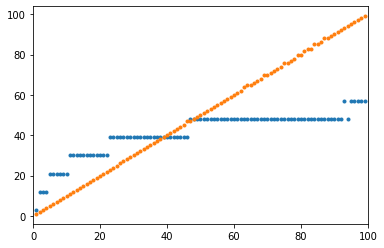

In [8]:
from complexite import *

show_graphique()

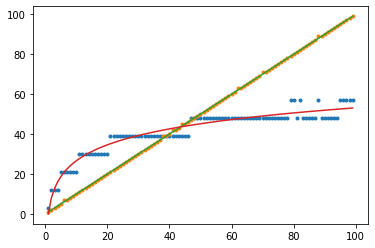

In [9]:
show_graphique_2()

# $\color{red}{\text{Classe de complexité de l'algorithme par dichotomie}}$

<div class="alert alert-block alert-success">
    <b><h2>Définition </h2></b> 
<br />
Soit $n$ et $k$ deux nombres entiers tels que  $ n = 2^k $. $k$ s'appelle le logarithme en base 2 de $n$.
<br />
On écrira __$ k = log_2(n) $__
<br />
Par extension, si un entier n est tel que $ 2^k < n < 2^{k+1} $, on dira que $ k \approx log_2(n) $

</div>
    
### Exemples :

$ 8 = 2^3 $ donc $ 3 = log_2(8) $

$ 2^3 < 10 < 2^4 $ donc  $3 \approx log_2(10) $
    
$ 2^{13} < 10000 < 2^{14} $ donc $ 13 \approx log_2(10000)$ 

<div class="alert alert-block alert-success">
    <b><h2>Propriété</h2></b>

La classe de complexité de l'algorithme de dichotomie est $O(log_2(n))$
</div>

Tachons de nous en convaincre sur un exemple, reprenons le deuxième exemple rencontrée :

%%html

<tr>
    <td align="center"><img src="img/dichotomie_2.png"></td>
    <td>
        <p>
                La taille du tableau est de 10.
                <br /><br />
                On constate qu'à chaque étape la taille du tableau est divisé par 2.
            <br /><br />
                En 3 étapes, la taille du tableau est ramené à 1 et l'algorithme se termine.
                <br />
                <br />
                Or, $ 2^3 < 10 < 2^4 $ , on a donc bien une complexité en $log_2(10)$
                </p>
     </td>
        
                
                
     
    
</tr>    
    

# $\color{red}{\text{Une remarque finale}}$

L'algorithme de dichotomie n'a de sens que si le tableau est trié alors que l'algorithme naïf fonctionne avec des tableaux __même non triés__.

Nous avons vu que les algorithmes de tris ont une complexité quadratique, d'un coût beaucoup plus important. C'est donc cette classe de complexité qui dominera quelle que soit le coût de recherche d'un élément.

__Toutefois, il existe des algorithmes beaucoup plus efficace que ceux rencontrés.__ Les meilleurs ont une complexité en $O(nlog_2(n))$ meilleur qu'une complexité linéaire. Dans ce cas là, l'algorithme par dichotomie prend tout son sens.



# $\color{red}{\text{Exercices}}$

### Exercice 4

1. On donne la liste t = [-2,5,7,3,-5,11,22,13,8,15]. Dresser l'arbre d'exécution de l'algorithme de dichotomie pour la recherche de la valeur 5.
2. Reprenez la question précédente avec la recherche de la valeur 20.

### Exercice 5 

On souhaite programmer le jeu suivant :

- L'utilisateur (humain) choisit un nombre au hasard entre deux bornes fixés à l'avance.
- L'ordinateur propose une réponse et l'utilisateur indique si la réponse est inférieur ou supérieur au nombre choisi.
- On répète l'étape précédente jusqu'à ce que l'ordinateur trouve la réponse.

In [ ]:
def juste_nombre(n,a,b):
    reponse ='N'
    fini = False
    while reponse != 'O' and not fini :
        rep = (a+b)//2
        print('Le nombre choisi est-il ', rep)
        reponse = input('La réponse est-elle correcte ? (O/N) ')
        if reponse == 'O' :
            fini = True
        else :
            r = input('Le nombre choisi est-il supérieur ou inférieur à ma proposition ? (+/-)')
        if r == '+' :
            a = rep +1
        else :
            b = rep - 1
    return rep

if __name__=='__main__' :
    n = input('Quel est le nombre choisi ?')
    print(juste_nombre(n,0,100))  
    